**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp 
import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, pairwise_distances


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [111]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm = 'brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
        
    def fit(self, X, y):
        self.Y_train = y
        
        if self.algorithm == 'brute':
            
            self.X_train = X
            
        elif self.algorithm == 'kd_tree':
            
            self.X_train = KDTree(X)    
        self.count = len(np.unique(y))
        
    def predict(self, X):
        if self.algorithm == 'brute':
            dist = pairwise_distances(X, self.X_train, metric = self.metric)
            ind = np.argpartition(dist, self.n_neighbors, axis = 1)[:, 0:self.n_neighbors]
            
        elif self.algorithm == 'kd_tree':
            
            dist, ind = self.X_train.query(X, k = self.n_neighbors)
            
        result = np.apply_along_axis(np.bincount, 1, self.Y_train[ind], minlength = self.count)
        return result.argmax(axis = 1)
        
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [112]:
iris = datasets.load_iris()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [114]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [115]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [116]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [117]:
%time clf.fit(X_train, y_train)

Wall time: 993 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [118]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [119]:
%time clf.predict(X_test)

Wall time: 4.98 ms


array([2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1])

In [120]:
%time my_clf.predict(X_test)

Wall time: 974 µs


array([2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [121]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [122]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [123]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [124]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [125]:
%time clf.predict(X_test)

Wall time: 2.99 ms


array([0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1])

In [126]:
%time my_clf.predict(X_test)

Wall time: 999 µs


array([0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1], dtype=int64)

In [127]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [128]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [129]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [130]:
vectorizer = CountVectorizer(stop_words = ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(MyKNeighborsClassifier(n_neighbors = 3), X, target, cv=3)
scores

array([0.22004242, 0.19676478, 0.22381331])

In [131]:
scores.mean()

0.21354017127041322

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [136]:
def find_neighbors(metric = 'euclidean'):
    mylist = list()
    for i in range (1, 11):
        mylist.append(np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors = i, metric = metric), X, target, cv = 3)))
    result = np.array(mylist)
    return result.argmax() + 1

In [137]:
find_neighbors()

1

In [138]:
find_neighbors('cosine')

10

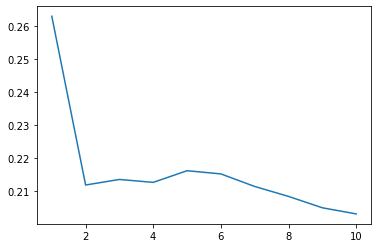

In [33]:
mylist = list()
for i in range (1, 11):
    mylist.append(np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors = i), X, target, cv = 3)))
result = np.array(mylist)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), result)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

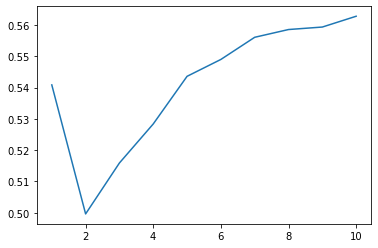

In [141]:
mylist = list()
for i in range (1, 11):
    mylist.append(np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors = i, metric = 'cosine'), X, target, cv = 3)))
result = np.array(mylist)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), result)

In [335]:
vectorizer = TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(data)

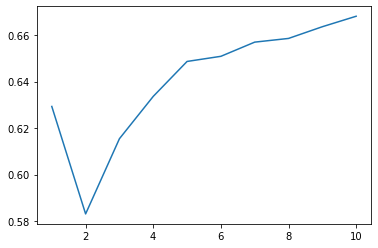

In [337]:
mylist = list()
for i in range (1, 11):
    mylist.append(np.mean(cross_val_score(MyKNeighborsClassifier(n_neighbors = i, metric = 'cosine'), X, target, cv = 3)))
result = np.array(mylist)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), result)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [35]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [36]:
test_data = newsgroups['data']
test_target = newsgroups['target']
vectorizer = TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS)

X_test = vectorizer.fit_transform(test_data)
X_train = vectorizer.transform(data)

clf = MyKNeighborsClassifier(n_neighbors = 10, metric ='cosine')
clf.fit(X_train, target)

accuracy_score(clf.predict(X_test), test_target)

0.5993096123207647

In [133]:
from sklearn.model_selection import cross_val_score

vectorizer = TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(data)
scores = cross_val_score(MyKNeighborsClassifier(n_neighbors = 10, metric ='cosine'), X, target, cv=3)

scores.mean()

0.6681106365212592

In [37]:
vectorizer = CountVectorizer(stop_words = ENGLISH_STOP_WORDS)

X_test = vectorizer.fit_transform(test_data)
X_train = vectorizer.transform(data)

clf = MyKNeighborsClassifier(n_neighbors = 10, metric ='cosine')
clf.fit(X_train, target)

accuracy_score(clf.predict(X_test), test_target)

0.5010621348911312

In [134]:
from sklearn.model_selection import cross_val_score

vectorizer = CountVectorizer(stop_words = ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(data)
scores = cross_val_score(MyKNeighborsClassifier(n_neighbors = 10, metric ='cosine'), X, target, cv=3)

scores.mean()

0.5627535406999464

In [38]:
vectorizer = CountVectorizer(stop_words = ENGLISH_STOP_WORDS)

X_test = vectorizer.fit_transform(test_data)
X_train = vectorizer.transform(data)

clf = MyKNeighborsClassifier(n_neighbors = 10)

clf.fit(X_train, target)

accuracy_score(clf.predict(X_test), test_target)

0.1983536909187467

In [135]:
from sklearn.model_selection import cross_val_score

vectorizer = CountVectorizer(stop_words = ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(data)
scores = cross_val_score(MyKNeighborsClassifier(n_neighbors = 10), X, target, cv=3)

scores.mean()

0.20311027891504052

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [ ]:
Лучший результат: косинусная метрика и tfidf векторизация.
Точность на кросс-валидации немного больше, наверное, из-за того, что мы берем 
среднее значения на фолдах.